In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten , Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

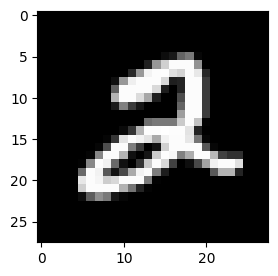

In [4]:
plt.figure(figsize=(3,3))
plt.imshow(X_train[5], cmap='gray')
plt.show()

#### DATA SHOULD BE STANDARDISED/NORMALISED BEFORE GIVING INPUT TO NEURAL NETWORK

In [5]:
X_train=X_train/255
X_test=X_test/255

### THE DATA IS IN 2D FORM (28 X 28) IT SHOULD BE CONVERTED TO 1D BEFORE SUPPLYING IT AS AN INPUT

Flatten
> it reshapes the data into 1D

Dense
>fully connected neuron

In [6]:
model = Sequential()
model.add(Input(shape=(28,28)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
hist=model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8651 - loss: 0.4805 - val_accuracy: 0.9562 - val_loss: 0.1512
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9618 - loss: 0.1333 - val_accuracy: 0.9675 - val_loss: 0.1119
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9740 - loss: 0.0900 - val_accuracy: 0.9655 - val_loss: 0.1062
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9801 - loss: 0.0652 - val_accuracy: 0.9718 - val_loss: 0.0905
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9861 - loss: 0.0482 - val_accuracy: 0.9695 - val_loss: 0.1009
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9895 - loss: 0.0380 - val_accuracy: 0.9720 - val_loss: 0.0917
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9917 - loss: 0.0288 - val_accuracy: 0.9757 - val_loss: 0.0851
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9939 - loss: 0.0223 

In [10]:
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.49295090e-11, 3.50484984e-12, 9.24996897e-08, ...,
        9.99988139e-01, 3.49851681e-09, 3.00212051e-08],
       [3.06634683e-11, 2.15829576e-08, 9.99999702e-01, ...,
        5.86681820e-17, 7.41898321e-10, 8.42692592e-21],
       [6.81065089e-08, 9.99649525e-01, 5.00858478e-05, ...,
        2.48449360e-04, 4.66973033e-05, 9.14765295e-08],
       ...,
       [1.77519660e-18, 1.07595444e-13, 5.06823276e-16, ...,
        4.10427736e-09, 6.22284375e-08, 6.27598467e-07],
       [1.67503774e-13, 4.04556624e-14, 2.00085726e-17, ...,
        9.56061122e-16, 3.30154641e-08, 6.18936814e-13],
       [1.92528354e-11, 2.96044996e-17, 8.00465250e-11, ...,
        1.66159343e-17, 2.96934742e-12, 3.38230923e-16]], dtype=float32)

In [11]:
y_prob=model.predict(X_test)
y_pred=y_prob.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [12]:
accuracy_score(y_test,y_pred)

0.9797

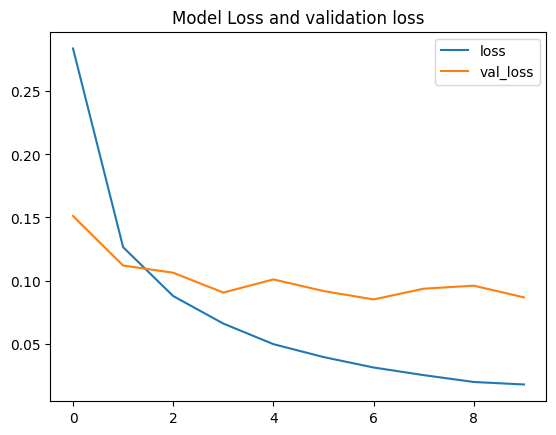

In [19]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model Loss and validation loss")
plt.legend(['loss','val_loss'])

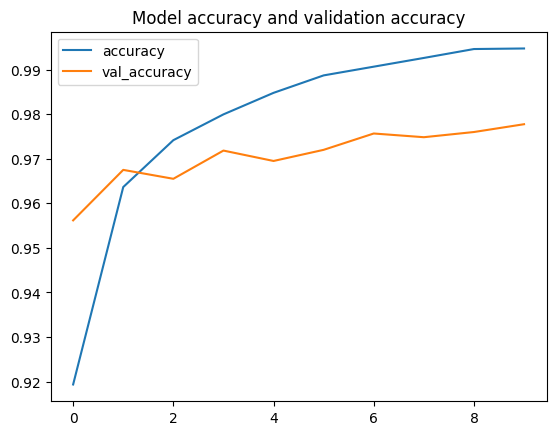

In [18]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model accuracy and validation accuracy")
plt.legend(['accuracy','val_accuracy'])

In [21]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf',gamma=0.01)
svm.fit(X_train.reshape(-1,28*28),y_train)
y_pred=svm.predict(X_test.reshape(-1,28*28))
accuracy_score(y_test,y_pred)

0.9769